In [1]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from scipy import stats
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn import preprocessing
import graphviz
import os
import seaborn as sns
import sklearn
from statsmodels.stats.stattools import jarque_bera as jb
from statsmodels.compat import lzip
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
pd.options.mode.chained_assignment = None  # default='warn'
import statsmodels.stats as st
from statsmodels.stats import outliers_influence
from factor_analyzer import FactorAnalyzer
import geopandas as gpd
import libpysal as lps
import esda
import spreg
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
def vip(model):
    t = model.x_scores_
    w = model.x_weights_
    q = model.y_loadings_
    p, h = w.shape
    vips = np.zeros((p,))
    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)
    for i in range(p):
        weight = np.array([ (w[i,j] / np.linalg.norm(w[:,j]))**2 for j in range(h) ])
        vips[i] = np.sqrt(p*(s.T @ weight)/total_s)
    return vips

In [2]:
###########   CREATING ORIGINAL DATAFILE WITH DUMMY VARIABLES FOR YEARS (WITH NETWORK ELEMENTS)
gdf=gpd.read_file(r"/Users/shagunmittal/Documents/research/Spatial/20_finalvars/20_finalvars.shp")
ngroups=20
initial=1990

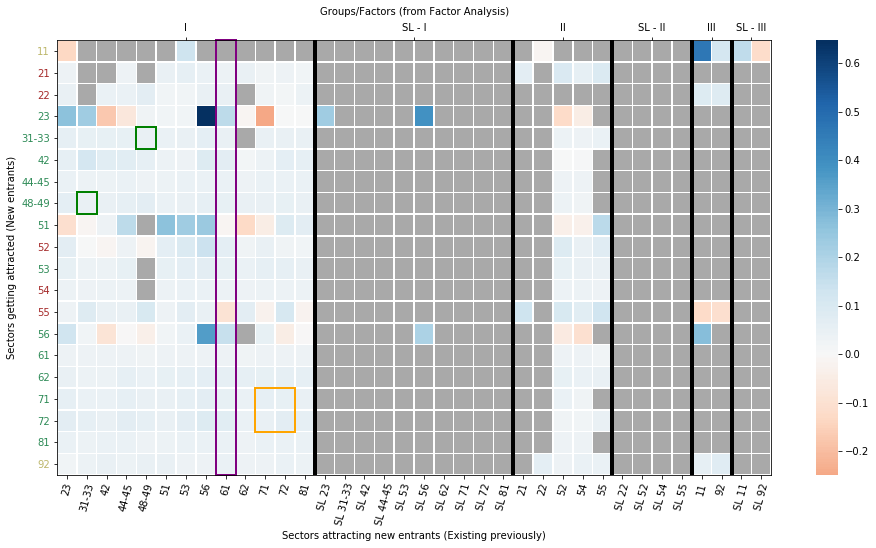

In [8]:
from matplotlib.patches import Rectangle
import matplotlib.ticker as ticker
from mpl_toolkits.axisartist.parasite_axes import SubplotHost
years=1992
df9=gdf
group_names=["11","21","22","23","31-33","42","44-45","48-49","51","52","53","54","55","56","61","62","71","72","81","92"]
ngroups=20
ncomponents=3
nv=np.zeros((ncomponents,ngroups))
for years in range(2005,2006):
    factors=np.zeros((1,ngroups))
    y=years
    df98=df9[df9["YEAR"]==y]    
    df97=df98[df98["NGROUP"]==1]
    df991=pd.DataFrame()
    df991["G1"]=df97["G1"].values
    for cnt in range(1,ngroups+1):
        n="G"+str(cnt)
        x=df97[[n]].values
        st_scaler=preprocessing.StandardScaler()
        x_st=st_scaler.fit_transform(x)
        df991[n]=pd.DataFrame(x_st)
    fa=FactorAnalyzer(ncomponents,rotation="varimax")
    x=df991
    fa.fit(x)
    loads=fa.loadings_
    for cnt in range(0,ngroups):
        if np.max(loads[cnt])>0.5:
            factors[0,cnt]=np.argmax(loads[cnt])+1
        else:
            factors[0,cnt]=np.argmax(loads[cnt])+1
    arrg1=[]
    arrg2=[]
    arrg3=[]
    for cnt in range(0,ngroups):
        if factors[0,cnt]==1:
            arrg1.append(cnt)
        if factors[0,cnt]==2:
            arrg2.append(cnt)
        if factors[0,cnt]==3:
            arrg3.append(cnt)

    gdf9=gdf
    group_names=["11","21","22","23","31-33","42","44-45","48-49","51","52","53","54","55","56","61","62","71","72","81","92"]
    ngroups=20
    noweights=[2,8,9,15]
    var_names=[]
    for cnt in arrg1:
        var_names.append(group_names[cnt])
    l1=0
    for cnt in arrg1:
        if (cnt+1) in noweights:
            continue
        var_names.append("SL "+group_names[cnt])
        l1=l1+1

    for cnt in arrg2:
        var_names.append(group_names[cnt])
    l2=0
    for cnt in arrg2:
        if (cnt+1) in noweights:
            continue
        var_names.append("SL "+group_names[cnt])
        l2=l2+1

    for cnt in arrg3:
        var_names.append(group_names[cnt])
    l3=0
    for cnt in arrg3:
        if (cnt+1) in noweights:
            continue
        var_names.append("SL "+group_names[cnt])
        l3=l3+1
    sign=np.zeros((ngroups,len(var_names)))


    # for cnt in range(1,ngroups+1):
    #     var_names.append(group_names[cnt-1])
    #     if cnt in noweights:
    #         continue
    #     var_names.append("SL "+group_names[cnt-1])
    for g in range(1,ngroups+1):
        gdf98=gdf9[gdf9["YEAR"]==y]
        gdf98=gdf98[gdf98["NGROUP"]==g]
        W=lps.weights.Queen.from_dataframe(gdf98)
        x=gdf98[["NENTRY"]].values
        st_scaler=preprocessing.StandardScaler()
        x_st=st_scaler.fit_transform(x)
        df99=pd.DataFrame()
        df99["NENTRY"]=gdf98["YEAR"].values
        df99["NENTRY"]=pd.DataFrame(x_st)
        for cnt in arrg1:
            column="G"+str((g-1)*ngroups + 1 + cnt)
            x=gdf98[[column]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column]=pd.DataFrame(x_st)
        for cnt in arrg1:
            if (cnt+1) in noweights:
                continue
            column="G"+str((g-1)*ngroups + 1 + cnt)
            gdf98["W_"+column]=lps.weights.lag_spatial(W, gdf98[column].values)
            column2="W_"+column
            x=gdf98[[column2]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column2]=pd.DataFrame(x_st)
        for cnt in arrg2:
            column="G"+str((g-1)*ngroups + 1 + cnt)
            x=gdf98[[column]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column]=pd.DataFrame(x_st)
        for cnt in arrg2:
            if (cnt+1) in noweights:
                continue
            column="G"+str((g-1)*ngroups + 1 + cnt)
            gdf98["W_"+column]=lps.weights.lag_spatial(W, gdf98[column].values)
            column2="W_"+column
            x=gdf98[[column2]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column2]=pd.DataFrame(x_st)
        for cnt in arrg3:
            column="G"+str((g-1)*ngroups + 1 + cnt)
            x=gdf98[[column]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column]=pd.DataFrame(x_st)
        for cnt in arrg3:
            if (cnt+1) in noweights:
                continue
            column="G"+str((g-1)*ngroups + 1 + cnt)
            gdf98["W_"+column]=lps.weights.lag_spatial(W, gdf98[column].values)
            column2="W_"+column
            x=gdf98[[column2]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column2]=pd.DataFrame(x_st)
        df99.head()
        mse=[]
        X=df99.drop(columns=["NENTRY"]).values
        Y=df99["NENTRY"].values
        for i in range(1,(2*ngroups)-len(noweights)+1):
            pls=PLSRegression(n_components=i)
        #     pls.fit(X,Y)
            y_cv=cross_val_predict(pls,X,Y,cv=5)
            mse.append(mean_squared_error(Y,y_cv))
    #     X=np.linspace(1,ngroups,ngroups)
    #     plt.plot(X,mse)
    #     plt.show()    
        comps=np.argmin(mse)+1
        pls=PLSRegression(n_components=comps)
        pls.fit(X,Y)
        VIPs=(vip(pls))
        coefficients=pls.coef_
        for cnt in range(0,(ngroups*2)-len(noweights)):
            if VIPs[cnt]>1:
                sign[g-1,cnt]=coefficients[cnt]
            else:
                sign[g-1,cnt]=None
    fig,ax =plt.subplots(figsize=(16,8))
    chart=sns.heatmap(sign,cmap="RdBu",xticklabels=var_names,yticklabels=group_names, linewidth=0.5, center=0)
    chart.add_patch(Rectangle((len(arrg1),0),0,ngroups,fill=None,edgecolor="black",lw=4,clip_on=False))
    chart.add_patch(Rectangle((len(arrg1)+l1,0),0,ngroups,fill=None,edgecolor="black",lw=4,clip_on=False))
    chart.add_patch(Rectangle((len(arrg1)+l1+len(arrg2),0),0,ngroups,fill=None,edgecolor="black",lw=4,clip_on=False))
    chart.add_patch(Rectangle((len(arrg1)+l1+len(arrg2)+l2,0),0,ngroups,fill=None,edgecolor="black",lw=4,clip_on=False))
    chart.add_patch(Rectangle((len(arrg1)+l1+len(arrg2)+l2+len(arrg3),0),0,ngroups,fill=None,edgecolor="black",lw=4,clip_on=False))
    ax.set_facecolor("darkgray")
    ax.set_xticklabels(var_names,rotation=75)
    ax.set_xlabel("Sectors attracting new entrants (Existing previously)")
    ax.set_ylabel("Sectors getting attracted (New entrants)")
    ax2=ax.twiny()
    positions=[len(arrg1)/2,len(arrg1)+l1/2,len(arrg1)+l1+len(arrg2)/2,len(arrg1)+l1+len(arrg2)+l2/2,len(arrg1)+l1+len(arrg2)+l2+len(arrg3)/2,len(arrg1)+l1+len(arrg2)+l2+len(arrg3)+l3/2]
    positions=np.array(positions)
    positions=positions/(len(arrg1)+l1+len(arrg2)+l2+len(arrg3)+l3)
    ax2.set_xticks(positions)
    ax2.set_xticklabels(["I","SL - I","II","SL - II","III","SL - III"])
    ax2.set_xlabel("Groups/Factors (from Factor Analysis)",labelpad=8)
    cnt=0
    for lab in ax.get_yticklabels():
        if cnt in arrg1:
            lab.set_color("seagreen")
        if cnt in arrg2:
            lab.set_color("brown")
        if cnt in arrg3:
            lab.set_color("darkkhaki")
        cnt=cnt+1
    if years==1992:
        chart.add_patch(Rectangle((0,8),len(arrg1),1,fill=None,edgecolor="cyan",lw=2,clip_on=False))
        chart.add_patch(Rectangle((0,6),len(arrg1),1,fill=None,edgecolor="black",lw=2,clip_on=False))
        chart.add_patch(Rectangle((9,16),2,2,fill=None,edgecolor="orange",lw=2,clip_on=False))
        chart.add_patch(Rectangle((7,0),1,ngroups,fill=None,edgecolor="purple",lw=2,clip_on=False))
        chart.add_patch(Rectangle((4,4),1,1,fill=None,edgecolor="green",lw=2,clip_on=False))
        chart.add_patch(Rectangle((1,7),1,1,fill=None,edgecolor="green",lw=2,clip_on=False))
        plt.savefig("/Users/shagunmittal/OneDrive - purdue.edu/Paper1/research_paper1/9a.eps",format="eps",bbox_inches="tight")
    elif years==2005:
#         chart.add_patch(Rectangle((0,8),len(arrg1),1,fill=None,edgecolor="cyan",lw=2,clip_on=False))
#         chart.add_patch(Rectangle((0,6),len(arrg1),1,fill=None,edgecolor="black",lw=2,clip_on=False))
        chart.add_patch(Rectangle((10,16),2,2,fill=None,edgecolor="orange",lw=2,clip_on=False))
        chart.add_patch(Rectangle((8,0),1,ngroups,fill=None,edgecolor="purple",lw=2,clip_on=False))
        chart.add_patch(Rectangle((4,4),1,1,fill=None,edgecolor="green",lw=2,clip_on=False))
        chart.add_patch(Rectangle((1,7),1,1,fill=None,edgecolor="green",lw=2,clip_on=False))
        plt.savefig("/Users/shagunmittal/OneDrive - purdue.edu/Paper1/research_paper1/9b.eps",format="eps",bbox_inches="tight")
#     else:
#         plt.savefig("/Users/shagunmittal/OneDrive - purdue.edu/research_paper1/G_"+str(years)+".eps",format="eps",bbox_inches="tight")

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

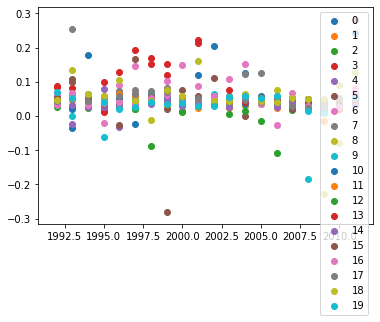

In [33]:
#########. CONSISTENCY FROM EDUCATION SERVICES 61
gdf9=gdf
group_names=["11","21","22","23","31-33","42","44-45","48-49","51","52","53","54","55","56","61","62","71","72","81","92"]
ngroups=20
noweights=[2,8,9,15]
sign=np.zeros((ngroups,(ngroups*2)-len(noweights)))
var_names=[]
for cnt in range(1,ngroups+1):
    var_names.append(group_names[cnt-1])
    if cnt in noweights:
        continue
    var_names.append("SL "+group_names[cnt-1])
main_arr=np.zeros((ngroups,2012-1992))
index=var_names.index("61")
for yr in range(1992,2012):
    sign=np.zeros((ngroups,(ngroups*2)-len(noweights)))
    for g in range(1,ngroups+1):
        gdf98=gdf9[gdf9["YEAR"]==yr]
        gdf98=gdf98[gdf98["NGROUP"]==g]
        W=lps.weights.Queen.from_dataframe(gdf98)
        x=gdf98[["NENTRY"]].values
        st_scaler=preprocessing.StandardScaler()
        x_st=st_scaler.fit_transform(x)
        df99=pd.DataFrame()
        df99["NENTRY"]=gdf98["YEAR"].values
        df99["NENTRY"]=pd.DataFrame(x_st)
        for cnt in range((g-1)*ngroups + 1,(g*ngroups)+1):
            column="G"+str(cnt)
            x=gdf98[[column]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column]=pd.DataFrame(x_st)
            if (cnt%ngroups) in noweights:
                continue
            gdf98["W_"+column]=lps.weights.lag_spatial(W, gdf98[column].values)
            column2="W_"+column
            x=gdf98[[column2]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column2]=pd.DataFrame(x_st)
        df99.head()
        mse=[]
        X=df99.drop(columns=["NENTRY"]).values
        Y=df99["NENTRY"].values
        for i in range(1,(2*ngroups)-len(noweights)+1):
            pls=PLSRegression(n_components=i)
        #     pls.fit(X,Y)
            y_cv=cross_val_predict(pls,X,Y,cv=5)
            mse.append(mean_squared_error(Y,y_cv))
    #     X=np.linspace(1,ngroups,ngroups)
    #     plt.plot(X,mse)
    #     plt.show()    
        comps=np.argmin(mse)+1
        pls=PLSRegression(n_components=comps)
        pls.fit(X,Y)
        VIPs=(vip(pls))
        coefficients=pls.coef_
        for cnt in range(0,(ngroups*2)-len(noweights)):
            if VIPs[cnt]>1:
                sign[g-1,cnt]=coefficients[cnt]
            else:
                sign[g-1,cnt]=None
        main_arr[g-1,yr-1992]=sign[g-1,index]
years=np.linspace(2011,1992,2012-1992)
for i in range(0,ngroups):
    plt.scatter(years.astype(int),main_arr[i,:],label=i)
plt.legend()

In [4]:
#################################. CONSISTENCY FOR RELATIONSHIPS
import matplotlib.ticker as ticker
from mpl_toolkits.axisartist.parasite_axes import SubplotHost
years=1992
df9=gdf
group_names=["11","21","22","23","31-33","42","44-45","48-49","51","52","53","54","55","56","61","62","71","72","81","92"]
ngroups=20
ncomponents=3
nv=np.zeros((ncomponents,ngroups))
education=np.zeros((ngroups,2012-1992))
g1=np.zeros((2012-1992,1))
g2=np.zeros((2012-1992,1))
G1=np.zeros((2012-1992,1))
G2=np.zeros((2012-1992,1))
G3=np.zeros((2012-1992,1))
G4=np.zeros((2012-1992,1))
for years in range(1992,2012):
    factors=np.zeros((1,ngroups))
    y=years
    df98=df9[df9["YEAR"]==y]    
    df97=df98[df98["NGROUP"]==1]
    df991=pd.DataFrame()
    df991["G1"]=df97["G1"].values
    for cnt in range(1,ngroups+1):
        n="G"+str(cnt)
        x=df97[[n]].values
        st_scaler=preprocessing.StandardScaler()
        x_st=st_scaler.fit_transform(x)
        df991[n]=pd.DataFrame(x_st)
    fa=FactorAnalyzer(ncomponents,rotation="varimax")
    x=df991
    fa.fit(x)
    loads=fa.loadings_
    for cnt in range(0,ngroups):
        if np.max(loads[cnt])>0.5:
            factors[0,cnt]=np.argmax(loads[cnt])+1
        else:
            factors[0,cnt]=np.argmax(loads[cnt])+1
    arrg1=[]
    arrg2=[]
    arrg3=[]
    for cnt in range(0,ngroups):
        if factors[0,cnt]==1:
            arrg1.append(cnt)
        if factors[0,cnt]==2:
            arrg2.append(cnt)
        if factors[0,cnt]==3:
            arrg3.append(cnt)

    gdf9=gdf
    group_names=["11","21","22","23","31-33","42","44-45","48-49","51","52","53","54","55","56","61","62","71","72","81","92"]
    ngroups=20
    noweights=[2,8,9,15]
    var_names=[]
    for cnt in arrg1:
        var_names.append(group_names[cnt])
    l1=0
    for cnt in arrg1:
        if (cnt+1) in noweights:
            continue
        var_names.append("SL "+group_names[cnt])
        l1=l1+1

    for cnt in arrg2:
        var_names.append(group_names[cnt])
    l2=0
    for cnt in arrg2:
        if (cnt+1) in noweights:
            continue
        var_names.append("SL "+group_names[cnt])
        l2=l2+1

    for cnt in arrg3:
        var_names.append(group_names[cnt])
    l3=0
    for cnt in arrg3:
        if (cnt+1) in noweights:
            continue
        var_names.append("SL "+group_names[cnt])
        l3=l3+1
    sign=np.zeros((ngroups,len(var_names)))


    # for cnt in range(1,ngroups+1):
    #     var_names.append(group_names[cnt-1])
    #     if cnt in noweights:
    #         continue
    #     var_names.append("SL "+group_names[cnt-1])
    for g in range(1,ngroups+1):
        gdf98=gdf9[gdf9["YEAR"]==y]
        gdf98=gdf98[gdf98["NGROUP"]==g]
        W=lps.weights.Queen.from_dataframe(gdf98)
        x=gdf98[["NENTRY"]].values
        st_scaler=preprocessing.StandardScaler()
        x_st=st_scaler.fit_transform(x)
        df99=pd.DataFrame()
        df99["NENTRY"]=gdf98["YEAR"].values
        df99["NENTRY"]=pd.DataFrame(x_st)
        for cnt in arrg1:
            column="G"+str((g-1)*ngroups + 1 + cnt)
            x=gdf98[[column]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column]=pd.DataFrame(x_st)
        for cnt in arrg1:
            if (cnt+1) in noweights:
                continue
            column="G"+str((g-1)*ngroups + 1 + cnt)
            gdf98["W_"+column]=lps.weights.lag_spatial(W, gdf98[column].values)
            column2="W_"+column
            x=gdf98[[column2]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column2]=pd.DataFrame(x_st)
        for cnt in arrg2:
            column="G"+str((g-1)*ngroups + 1 + cnt)
            x=gdf98[[column]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column]=pd.DataFrame(x_st)
        for cnt in arrg2:
            if (cnt+1) in noweights:
                continue
            column="G"+str((g-1)*ngroups + 1 + cnt)
            gdf98["W_"+column]=lps.weights.lag_spatial(W, gdf98[column].values)
            column2="W_"+column
            x=gdf98[[column2]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column2]=pd.DataFrame(x_st)
        for cnt in arrg3:
            column="G"+str((g-1)*ngroups + 1 + cnt)
            x=gdf98[[column]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column]=pd.DataFrame(x_st)
        for cnt in arrg3:
            if (cnt+1) in noweights:
                continue
            column="G"+str((g-1)*ngroups + 1 + cnt)
            gdf98["W_"+column]=lps.weights.lag_spatial(W, gdf98[column].values)
            column2="W_"+column
            x=gdf98[[column2]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column2]=pd.DataFrame(x_st)
        df99.head()
        mse=[]
        X=df99.drop(columns=["NENTRY"]).values
        Y=df99["NENTRY"].values
        for i in range(1,(2*ngroups)-len(noweights)+1):
            pls=PLSRegression(n_components=i)
        #     pls.fit(X,Y)
            y_cv=cross_val_predict(pls,X,Y,cv=5)
            mse.append(mean_squared_error(Y,y_cv))
    #     X=np.linspace(1,ngroups,ngroups)
    #     plt.plot(X,mse)
    #     plt.show()    
        comps=np.argmin(mse)+1
        pls=PLSRegression(n_components=comps)
        pls.fit(X,Y)
        VIPs=(vip(pls))
        coefficients=pls.coef_
        for cnt in range(0,(ngroups*2)-len(noweights)):
            if VIPs[cnt]>1:
                sign[g-1,cnt]=coefficients[cnt]
            else:
                sign[g-1,cnt]=None
        education[g-1,y-1992]=sign[g-1,var_names.index("61")]
        if g==5:
            g1[y-1992]=sign[g-1,var_names.index("48-49")]
        if g==8:
            g2[y-1992]=sign[g-1,var_names.index("31-33")]
        if g==17:
            G1[y-1992]=sign[g-1,var_names.index("71")]
            G2[y-1992]=sign[g-1,var_names.index("72")]
        if g==18:
            G3[y-1992]=sign[g-1,var_names.index("71")]
            G4[y-1992]=sign[g-1,var_names.index("72")]

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

In [28]:
if g==5:
    g1[yr-1992]=sign[g-1,var_names.index("48-49")]
if g==8:
    g2[yr-1992]=sign[g-1,var_names.index("31-33")]
if g==17:
    G1[yr-1992]=sign[g-1,var_names.index("71")]
    G2[yr-1992]=sign[g-1,var_names.index("72")]
if g==18:
    G3[yr-1992]=sign[g-1,var_names.index("71")]
    G4[yr-1992]=sign[g-1,var_names.index("72")]

25

86.0
4.75


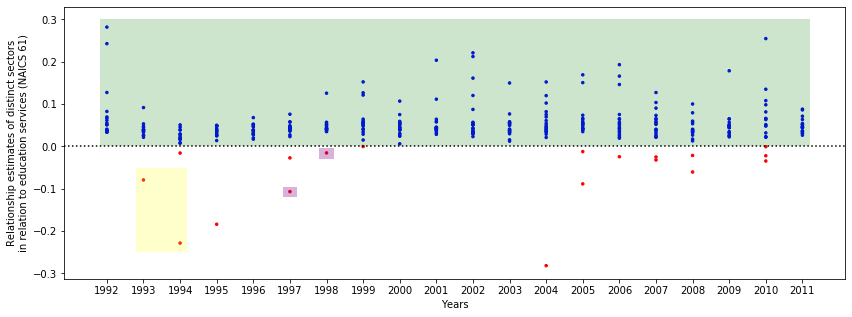

In [114]:
fig,ax=plt.subplots(figsize=(14,5))
years=np.linspace(1992,2011,2012-1992)
pos=0
neg=0
ggg=[8,9,12,15]
ggg=[8,9,2,5]
for i in range(0,ngroups):
# for i in ggg:
    cols=[]
    for i2 in range(0,2012-1992):
        if education[i,i2]>0:
            cols.append("blue")
            pos=pos+1
        else:
            cols.append("red")
        if main_arr[i,i2]<0:
            neg=neg+1
    chart=plt.scatter(years.astype(int),education[i,:],s=25,color=cols, marker=".")
plt.xticks(np.linspace(1992,2011,2012-1992).astype(int))
plt.axhline(y=0, linestyle='dotted', color='black')
ax.fill_between(np.linspace(1991.8,2011.2,2012-1992), 0, 0.3, facecolor='green', alpha=0.2)
ax.fill_between(np.linspace(1997.8,1998.2,2012-1992), -0.003, -0.03, facecolor='purple', alpha=0.3)
ax.fill_between(np.linspace(1996.8,1997.2,2012-1992), -0.095, -0.12, facecolor='purple', alpha=0.3)
ax.fill_between(np.linspace(1992.8,1994.2,2012-1992), -0.05, -0.25, facecolor='yellow', alpha=0.2)
plt.xlabel("Years")
plt.ylabel("Relationship estimates of distinct sectors\nin relation to education services (NAICS 61)")
plt.savefig("/Users/shagunmittal/OneDrive - purdue.edu/research_paper1/11a.pdf",format="pdf",bbox_inches="tight")
print(pos*100/(20*20))
print(neg*100/(20*20))

92.5
2.5


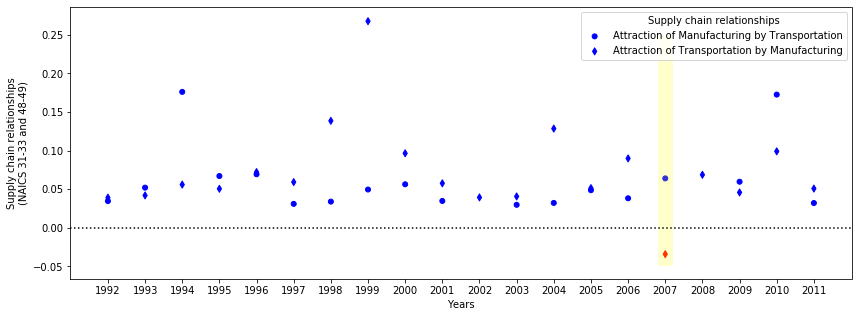

In [121]:
fig,ax=plt.subplots(figsize=(14,5))
pos=0
neg=0
cols=[]
years=np.linspace(1992,2011,2012-1992)
for i2 in range(0,2012-1992):
    if g1[i2]>0:
        cols.append("blue")
        pos=pos+1
    else:
        cols.append("red")
    if g1[i2]<0:
        neg=neg+1
plt.scatter(years.astype(int),g1,color=cols, s=25, marker="o", label="Attraction of Manufacturing by Transportation")
plt.xticks(np.linspace(1992,2011,2012-1992).astype(int))
cols=[]
for i2 in range(0,2012-1992):
    if g2[i2]>0:
        cols.append("blue")
        pos=pos+1
    else:
        cols.append("red")
    if g2[i2]<0:
        neg=neg+1
plt.scatter(years.astype(int),g2,color=cols, s=25, marker="d", label="Attraction of Transportation by Manufacturing")
plt.axhline(y=0, linestyle='dotted', color='black')
plt.xlabel("Years")
plt.ylabel("Supply chain relationships\n(NAICS 31-33 and 48-49)")
# ax.fill_between(np.linspace(1991.8,2011.2,2012-1992), 0, 0.3, facecolor='green', alpha=0.2)
ax.fill_between(np.linspace(2006.8,2007.2,2012-1992), 0.25, -0.05, facecolor='yellow', alpha=0.2)
plt.legend(title="Supply chain relationships")
plt.savefig("/Users/shagunmittal/OneDrive - purdue.edu/research_paper1/11c.pdf",format="pdf",bbox_inches="tight")
print(pos*100/(2*20))
print(neg*100/(2*20))

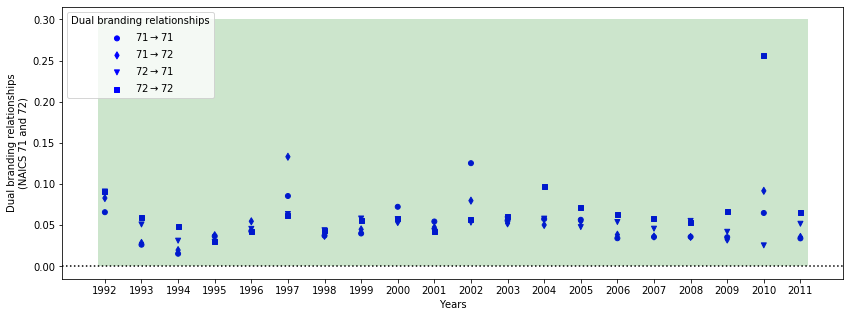

In [9]:
fig,ax=plt.subplots(figsize=(14,5))
pos=0
neg=0
cols=[]
years=np.linspace(1992,2011,2012-1992)
for i2 in range(0,2012-1992):
    if G1[i2]>0:
        cols.append("blue")
        pos=pos+1
    else:
        cols.append("red")
    if G1[i2]<0:
        neg=neg+1
plt.scatter(years.astype(int),G1.T,color=cols, s=25, marker="o", label="71$\\rightarrow$71")
plt.xticks(np.linspace(1992,2011,2012-1992).astype(int))
cols=[]
for i2 in range(0,2012-1992):
    if G2[i2]>0:
        cols.append("blue")
        pos=pos+1
    else:
        cols.append("red")
    if G2[i2]<0:
        neg=neg+1
plt.scatter(years.astype(int),G2.T,color=cols, s=25, marker="d", label="71$\\rightarrow$72")
cols=[]
for i2 in range(0,2012-1992):
    if G3[i2]>0:
        cols.append("blue")
        pos=pos+1
    else:
        cols.append("red")
    if G3[i2]<0:
        neg=neg+1
plt.scatter(years.astype(int),G3.T,color=cols, s=25, marker="v", label="72$\\rightarrow$71")
plt.xticks(np.linspace(1992,2011,2012-1992).astype(int))
cols=[]
for i2 in range(0,2012-1992):
    if G4[i2]>0:
        cols.append("blue")
        pos=pos+1
    else:
        cols.append("red")
    if G4[i2]<0:
        neg=neg+1
plt.scatter(years.astype(int),G4.T,color=cols, s=25, marker="s", label="72$\\rightarrow$72")
plt.axhline(y=0, linestyle='dotted', color='black')
plt.xlabel("Years")
plt.legend(title="Dual branding relationships")
ax.fill_between(np.linspace(1991.8,2011.2,2012-1992), 0, 0.3, facecolor='green', alpha=0.2)
plt.ylabel("Dual branding relationships\n(NAICS 71 and 72)")
plt.savefig("/Users/shagunmittal/OneDrive - purdue.edu/research_paper1/11b.pdf",format="pdf",bbox_inches="tight")

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/shagunmittal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 0
  warning

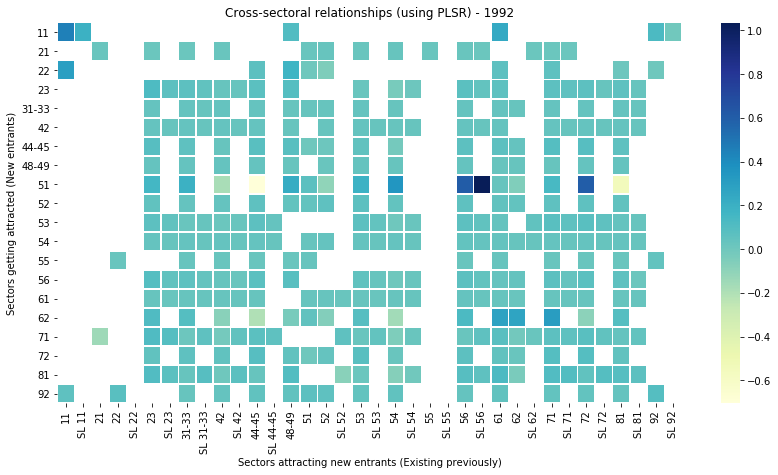

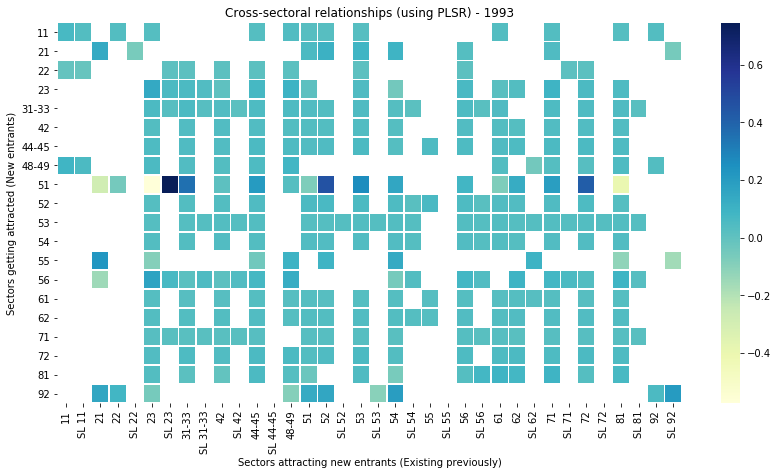

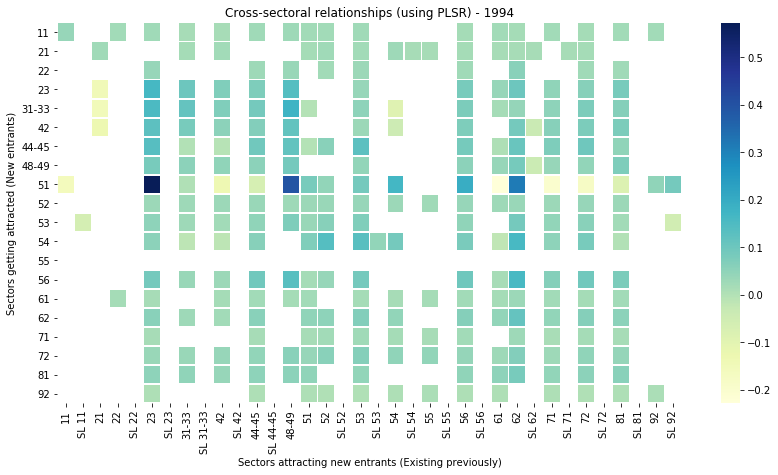

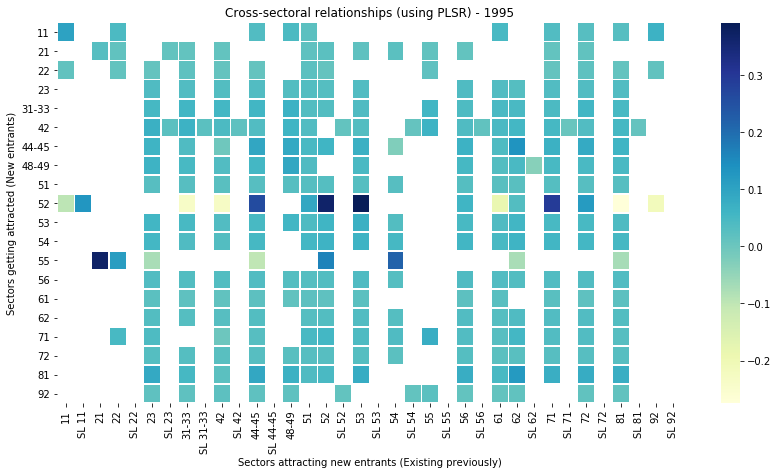

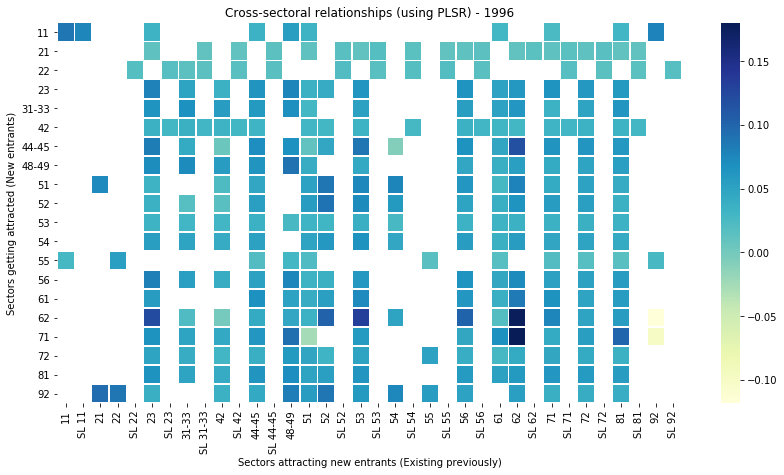

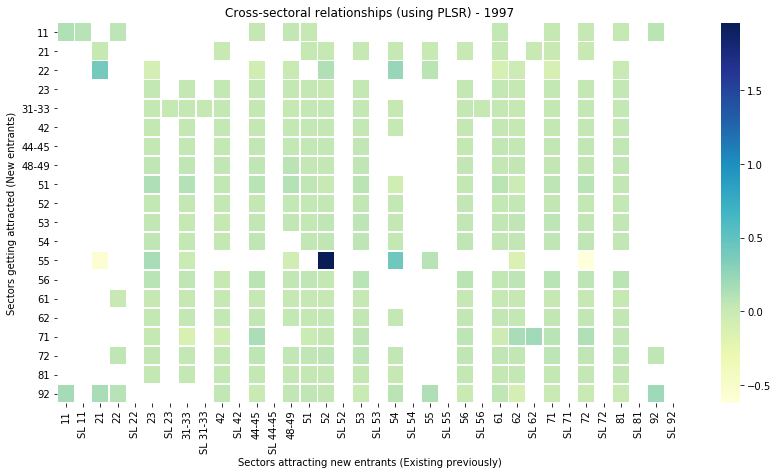

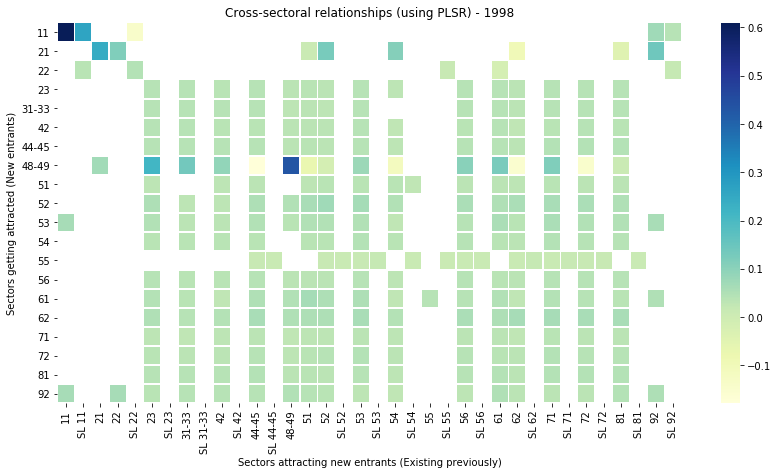

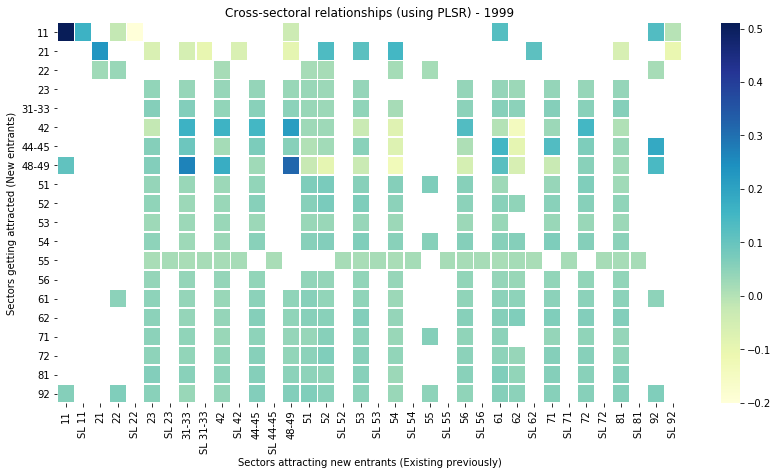

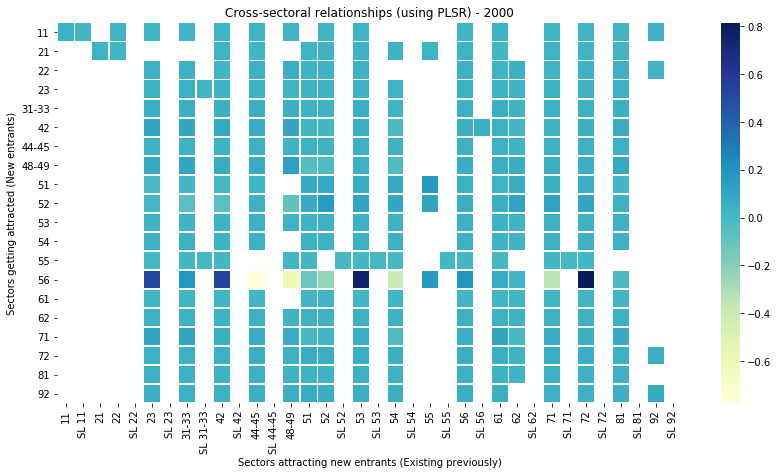

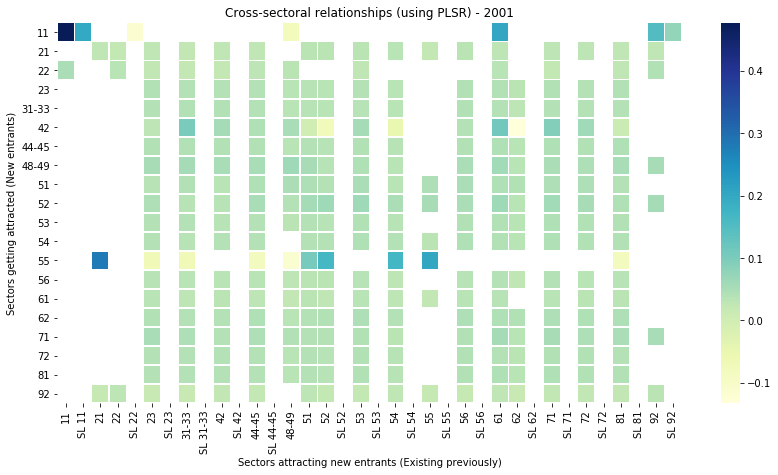

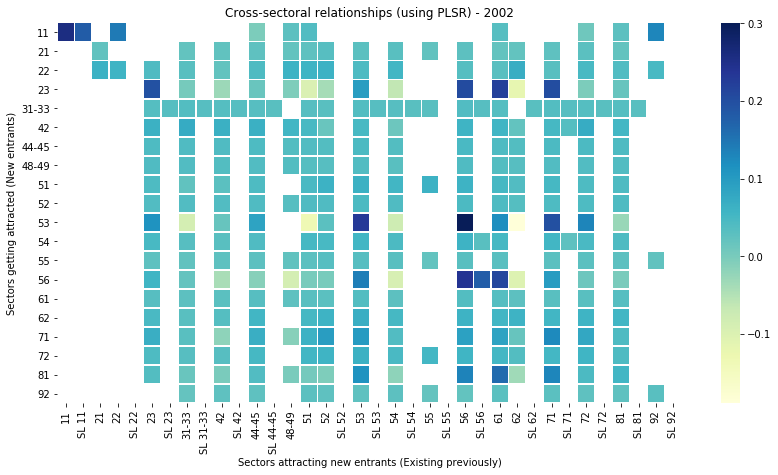

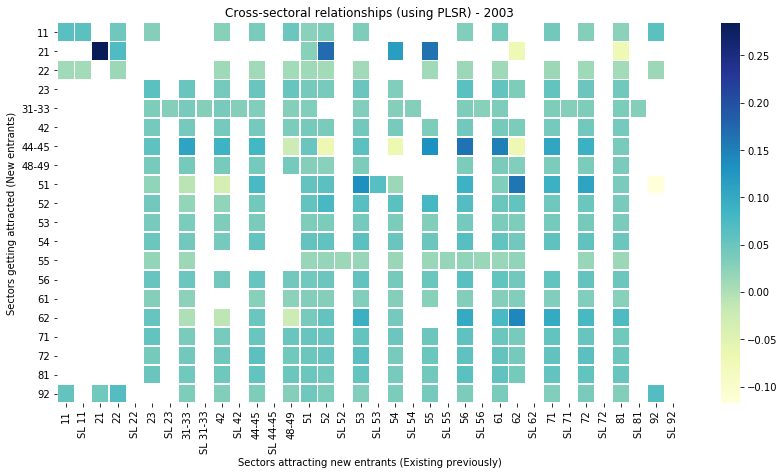

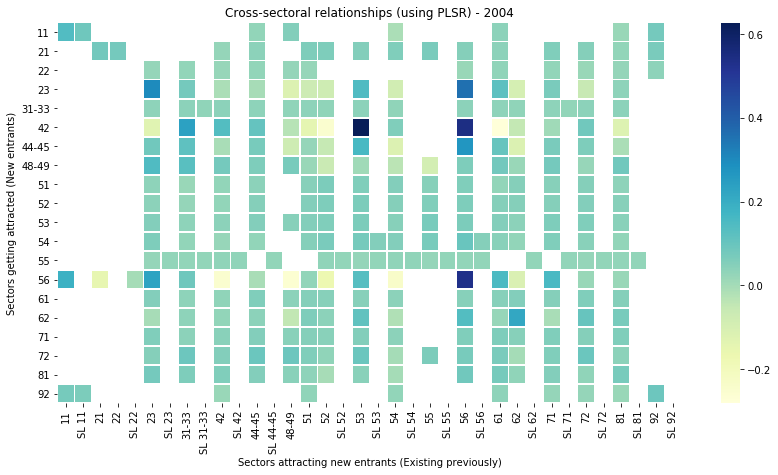

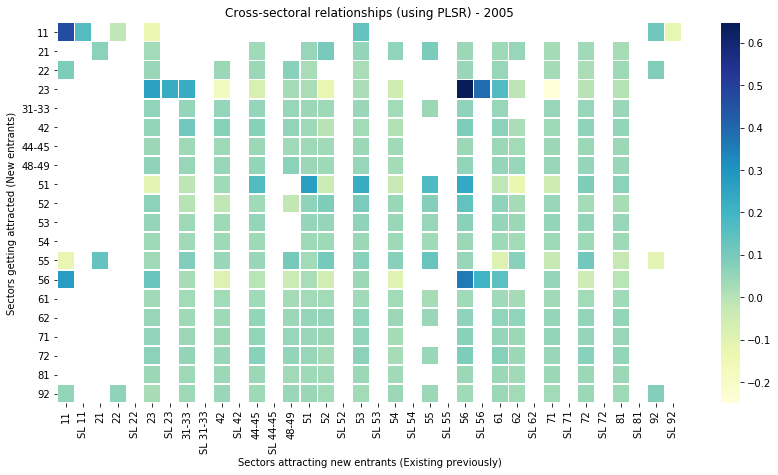

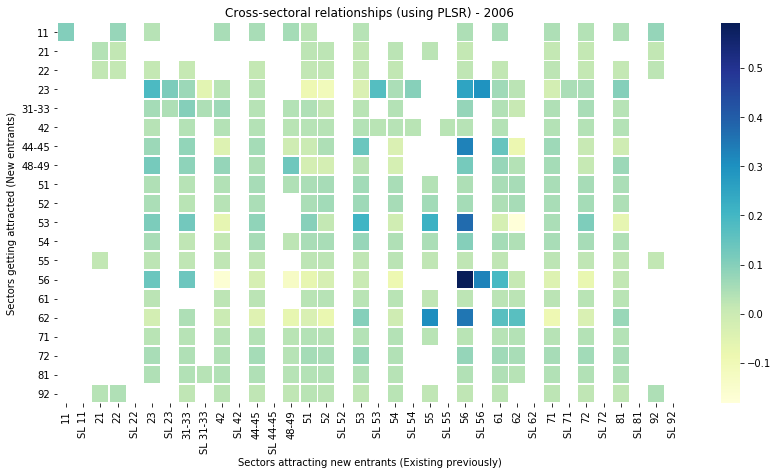

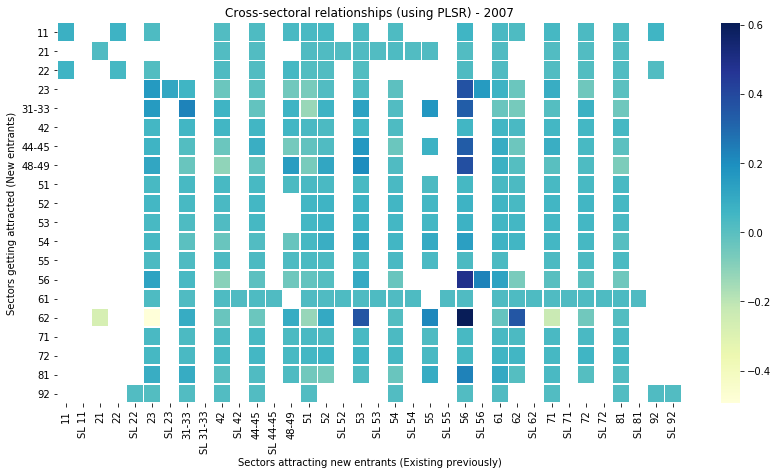

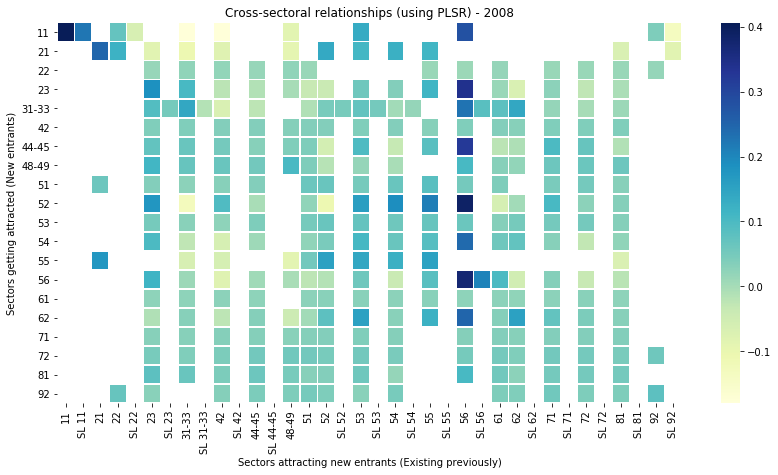

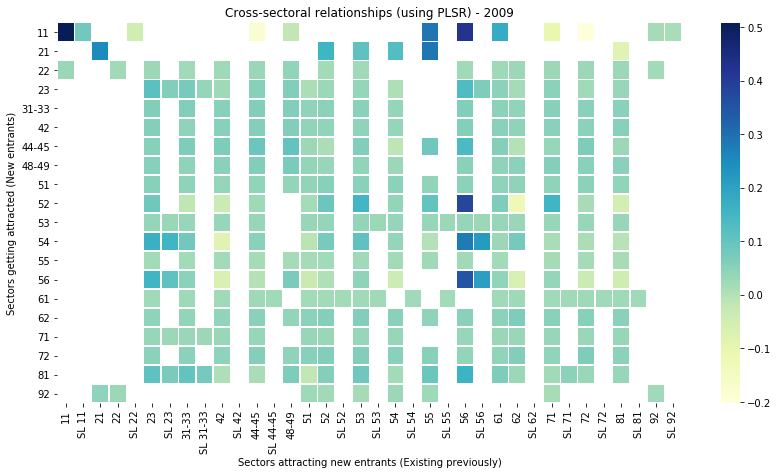

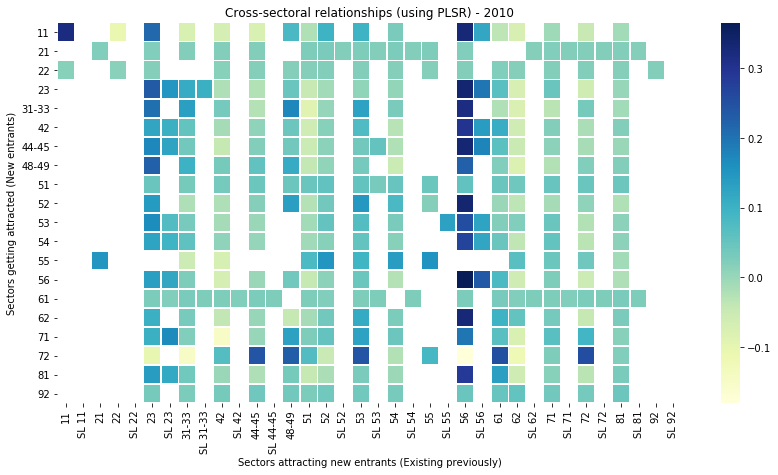

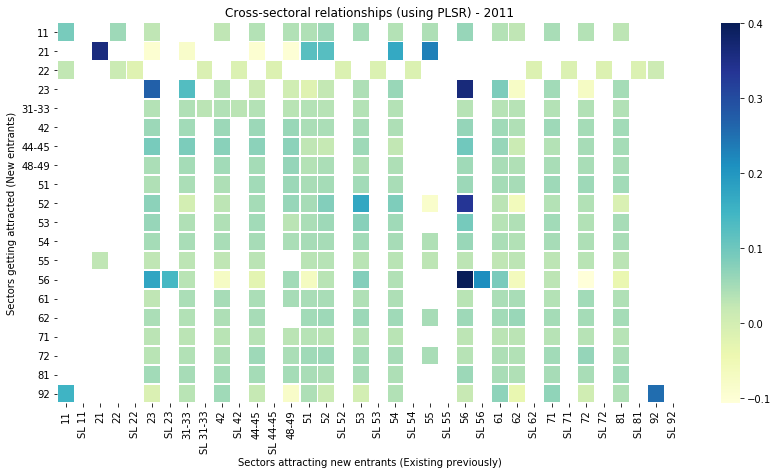

In [151]:
################################ SELECTION OF NUMBER OF COMPONENTS + FINDING SIGNIFICANT VARIABLES VIP>1
gdf9=gdf
group_names=["11","21","22","23","31-33","42","44-45","48-49","51","52","53","54","55","56","61","62","71","72","81","92"]
ngroups=20
noweights=[2,8,9,15]
sign=np.zeros((ngroups,(ngroups*2)-len(noweights)))
var_names=[]
for cnt in range(1,ngroups+1):
    var_names.append(group_names[cnt-1])
    if cnt in noweights:
        continue
    var_names.append("SL "+group_names[cnt-1])
for yr in range(1992,2012):
    for g in range(1,ngroups+1):
        gdf98=gdf9[gdf9["YEAR"]==yr]
        gdf98=gdf98[gdf98["NGROUP"]==g]
        W=lps.weights.Queen.from_dataframe(gdf98)
        x=gdf98[["NENTRY"]].values
        st_scaler=preprocessing.StandardScaler()
        x_st=st_scaler.fit_transform(x)
        df99=pd.DataFrame()
        df99["NENTRY"]=gdf98["YEAR"].values
        df99["NENTRY"]=pd.DataFrame(x_st)
        for cnt in range((g-1)*ngroups + 1,(g*ngroups)+1):
            column="G"+str(cnt)
            x=gdf98[[column]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column]=pd.DataFrame(x_st)
            if (cnt%ngroups) in noweights:
                continue
            gdf98["W_"+column]=lps.weights.lag_spatial(W, gdf98[column].values)
            column2="W_"+column
            x=gdf98[[column2]].values
            st_scaler=preprocessing.StandardScaler()
            x_st=st_scaler.fit_transform(x)
            df99[column2]=pd.DataFrame(x_st)
        df99.head()
        mse=[]
        X=df99.drop(columns=["NENTRY"]).values
        Y=df99["NENTRY"].values
        for i in range(1,(2*ngroups)-len(noweights)+1):
            pls=PLSRegression(n_components=i)
        #     pls.fit(X,Y)
            y_cv=cross_val_predict(pls,X,Y,cv=5)
            mse.append(mean_squared_error(Y,y_cv))
    #     X=np.linspace(1,ngroups,ngroups)
    #     plt.plot(X,mse)
    #     plt.show()    
        comps=np.argmin(mse)+1
        pls=PLSRegression(n_components=comps)
        pls.fit(X,Y)
        VIPs=(vip(pls))
        coefficients=pls.coef_
        for cnt in range(0,(ngroups*2)-len(noweights)):
            if VIPs[cnt]>1:
                sign[g-1,cnt]=coefficients[cnt]
            else:
                sign[g-1,cnt]=None
    fig=plt.figure()
    sns.heatmap(sign,cmap="YlGnBu",xticklabels=var_names,yticklabels=group_names, linewidth=0.5)
    plt.gcf().set_size_inches(14,7,plt.gcf().get_size_inches()[1])
    plt.ylim(20,0)
    plt.xlabel("Sectors attracting new entrants (Existing previously)")
    plt.ylabel("Sectors getting attracted (New entrants)")
    plt.title("Cross-sectoral relationships (using PLSR) - "+str(yr))
    plt.savefig("/Users/shagunmittal/OneDrive - purdue.edu/research_paper1/A7_"+str(yr)+".png",bbox_inches="tight")

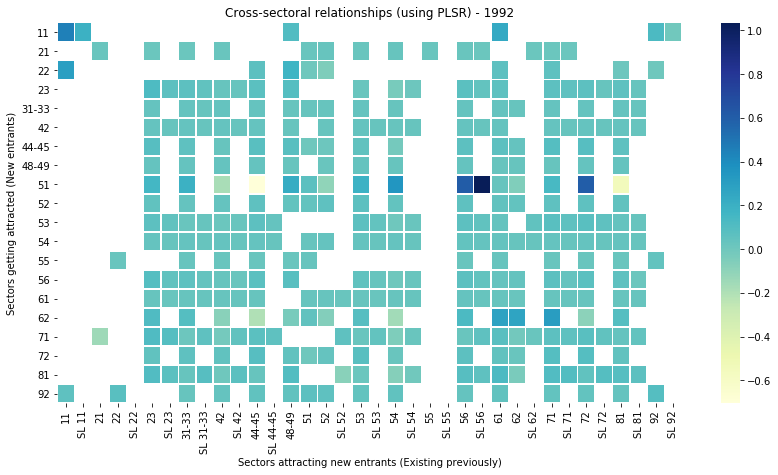

In [149]:
sns.heatmap(sign,cmap="RdBu",xticklabels=var_names,yticklabels=group_names, linewidth=0.5, center=0)
plt.gcf().set_size_inches(14,7,plt.gcf().get_size_inches()[1])
plt.ylim(20,0)
plt.xlabel("Sectors attracting new entrants (Existing previously)")
plt.ylabel("Sectors getting attracted (New entrants)")
plt.title("Cross-sectoral relationships (using PLSR) - 1992")
plt.savefig("/Users/shagunmittal/OneDrive - purdue.edu/research_paper1/A7_"+str(yr)+".png",bbox_inches="tight")

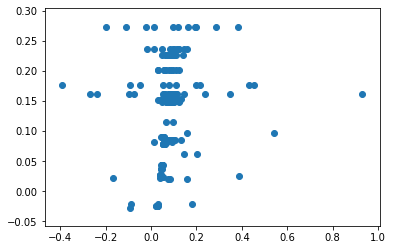

In [61]:
nv=([[-9.99000000e+02, -9.99000000e+02, -2.09164299e-02,
         1.77434629e-01,  1.48090260e-01,  1.62312922e-01,
         2.73839743e-01,  8.96659996e-02,  7.79908007e-02,
         1.52473338e-01,  1.50813426e-01,  2.01219799e-01,
        -2.40898806e-02,  1.53828382e-01,  4.41402743e-02,
         2.26983575e-01,  8.53636384e-02,  1.61797162e-01,
         2.37290988e-01, -9.99000000e+02],
       [-9.99000000e+02,  2.66029467e-02, -2.73485207e-02,
         4.08308538e-02,  4.76654818e-02,  6.24830501e-02,
         8.33619371e-02, -9.99000000e+02,  2.27560311e-02,
         8.12632534e-02,  5.26587998e-02,  1.15639168e-01,
        -2.05542735e-02,  4.83834577e-02,  3.69653633e-02,
         7.24357349e-02, -9.99000000e+02,  6.19901880e-02,
         5.48156405e-02,  2.00614966e-02],
       [ 9.73712487e-02, -9.99000000e+02,  2.56030223e-02,
         4.22910941e-02,  5.44357946e-02,  3.99132201e-02,
         8.52568991e-02,  2.73222017e-02, -9.99000000e+02,
         4.92498180e-02,  2.26941798e-02,  2.27685296e-02,
         2.11979998e-02,  3.00771457e-02, -9.99000000e+02,
         5.23491875e-02, -9.99000000e+02,  3.84027029e-02,
         6.18213686e-02,  6.15351274e-02]])
sign_orgX=np.zeros((ngroups,ngroups))
A=np.array([3., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1.,
       1., 1., 3.])
for cnt in range(0,ngroups):
    for cnt2 in range(0,3):
        if (nv[cnt2][cnt])!=-999:
            ind=np.where(A==cnt2+1)[0]
            for cnt3 in ind:
                sign_orgX[cnt,cnt3]=nv[cnt2][cnt]
        else:
            ind=np.where(A==cnt2+1)[0]
            for cnt3 in ind:
                sign_orgX[cnt,cnt3]=None
plt.scatter(sign.flatten(),sign_orgX.flatten())